<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/05_case_studies/01_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

In [16]:
raw_data = datasets.load_digits()
digits = raw_data.copy()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [17]:
images = digits['images']
targets = digits['target']
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

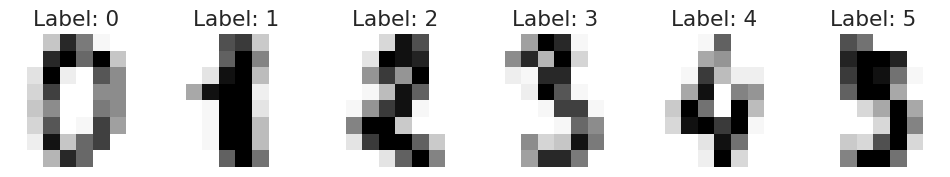

In [18]:
plt.figure(figsize=(12, 10))
for index, (image, target) in enumerate(list(zip(images, targets))[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f'Label: {target}')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [26]:
X_train[0]

array([ 0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  6., 16., 10.,
        0.,  0.,  0.,  0.,  0., 11., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       12., 15., 11.,  5.,  0.,  0.,  0.,  0., 14., 15., 12., 15., 11.,
        0.,  0.,  0., 12., 13.,  0.,  0., 16.,  5.,  0.,  0.,  6., 15.,
        4., 11., 16.,  4.,  0.,  0.,  0., 13., 16., 14.,  9.,  0.])

In [27]:
y_train[0]

6

In [31]:
#model maszyn wektorow nosnych
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [32]:
classifier.score(X_test, y_test)

0.9822222222222222

In [34]:
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9888888888888889

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array([8, 2, 6, 9, 7, 3, 7, 1, 8, 3, 6, 1, 2, 8, 8, 7, 5, 6, 9, 2, 4, 0,
       7, 5, 9, 4, 7, 1, 3, 3, 9, 6, 2, 3, 0, 5, 8, 5, 3, 1, 4, 8, 9, 3,
       1, 3, 1, 5, 0, 3, 9, 6, 6, 8, 0, 5, 4, 7, 5, 9, 9, 4, 1, 7, 6, 6,
       6, 0, 0, 8, 5, 4, 2, 1, 2, 9, 4, 4, 1, 5, 5, 7, 1, 5, 3, 9, 2, 5,
       8, 3, 5, 4, 9, 1, 0, 4, 0, 9, 4, 6, 3, 7, 7, 3, 7, 2, 4, 2, 3, 7,
       1, 0, 9, 0, 7, 0, 8, 9, 7, 1, 6, 8, 7, 4, 0, 4, 9, 6, 0, 8, 5, 4,
       1, 3, 7, 0, 2, 6, 3, 8, 4, 4, 3, 6, 5, 2, 5, 9, 8, 6, 2, 9, 2, 2,
       7, 8, 4, 2, 5, 9, 8, 9, 7, 7, 9, 9, 7, 7, 6, 2, 3, 8, 4, 9, 9, 6,
       1, 6, 8, 2, 7, 2, 7, 7, 0, 5, 1, 6, 1, 5, 0, 6, 0, 3, 2, 2, 6, 3,
       7, 2, 2, 7, 5, 1, 2, 0, 1, 6, 3, 1, 8, 0, 2, 1, 0, 8, 0, 9, 2, 2,
       1, 9, 5, 9, 6, 8, 7, 8, 1, 7, 7, 9, 5, 4, 4, 4, 1, 0, 0, 5, 8, 7,
       8, 7, 6, 6, 2, 4, 7, 7, 0, 2, 0, 3, 4, 4, 2, 8, 0, 9, 3, 3, 9, 6,
       6, 9, 9, 1, 2, 0, 6, 6, 4, 1, 8, 5, 1, 0, 8, 3, 0, 1, 4, 3, 5, 5,
       8, 7, 6, 5, 2, 0, 6, 6, 4, 6, 8, 7, 3, 1, 4,

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        47
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        47
           5       0.98      0.98      0.98        43
           6       0.98      0.98      0.98        46
           7       0.98      1.00      0.99        51
           8       0.98      1.00      0.99        43
           9       1.00      0.95      0.98        44

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 42]])

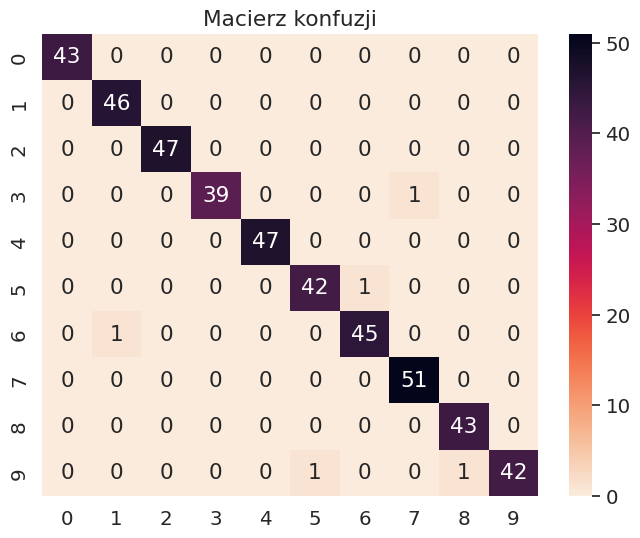

In [38]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [40]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index),
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [41]:
results = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
results

,y_test,y_pred
0,8,8
1,2,2
2,5,6
3,9,9
4,7,7
...,...,...
445,5,5
446,4,4
447,5,5
448,3,3


In [44]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs

[2, 35, 225, 241, 273]

In [45]:
results.loc[errors_idxs, :]

,y_test,y_pred
2,5,6
35,9,5
225,9,8
241,3,7
273,6,1


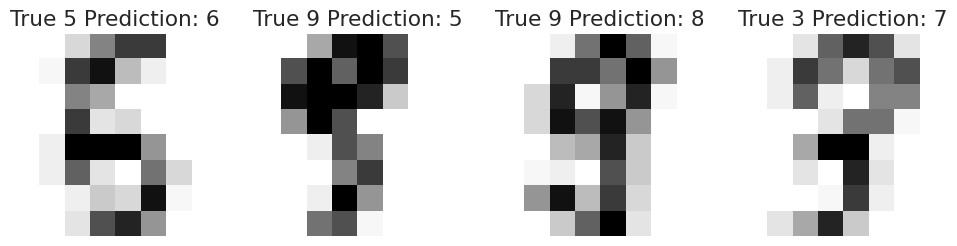

In [46]:
plt.figure(figsize=(12, 10))
for idx, error_idx in enumerate(errors_idxs[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_test']} Prediction: {results.loc[error_idx, 'y_pred']}")